In [68]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler
from scipy.signal import find_peaks

In [ ]:
#defining a two ring resonator system coupled to a waveguide and to each other as an array.
k_guide = -0.4j  #coupling between the waveguide and the ring
k_ring = -0.32j  #inter-ring coupling

#resonance frequencies - obtained through the dips in the tranmission spectrum at the through port for two rings.
data = np.loadtxt("C:\\Users\\Mitali\\OneDrive\\Desktop\\Research Project\\res_lambda_thr.csv", delimiter=',')
lambda_0_cpl = data[:,0]  #resonance wavelengths of the two rings (COUPLED)
#Coupling equations
print(lambda_0_cpl)  #wavelengths at which peaks are obtained using TMM.

w_0_cpl = data[:,1]
print(w_0_cpl)  #peaks for the 2 ring CROW using TMM

size = (np.size(w_0_cpl))

#w_0_cpl = (2 * np.pi) / lambda_0_cpl #resonant angular frequency (coupled)
#resonance frequency of each ring:

w_0 = (w_0_cpl[size - 1] + w_0_cpl[0]) / 2
print(w_0)  #all the rings will have the same resonant frequency because they are identical. 
# for i in range(len(w_0_cpl) - 1):
#     if i < len(w_0_cpl) - 1:
#         #print (i)
#         w_0.append((w_0_cpl[i] +w_0_cpl[i+1])/2)  #extracting the resonant frequency of the uncoupled rings in a CROW of 10 rings having 10 peaks.

#print(w_0)

#detuning frequency w-w_0
#w_detun = (w_0_cpl - w_0)
#print(w_detun)

#data = w_0
#np.savetxt("w_0_uncpl_10rings.csv", data, delimiter=",")

[1.55029860e-06 1.55045491e-06]
[4052887.17834771 4052478.5773425 ]
4052682.877845107


In [ ]:
#REVIEW!!
main_diag = w_0 * np.ones(size)
alt_diag = k_ring * np.ones(size - 1)

H = np.diag(main_diag) + np.diag(alt_diag, k=1) + np.diag(alt_diag, k=-1)
# H = [[w_0, k_ring], [k_ring, w_0]]
w_eigen = np.linalg.eigvals(H)

w_eigen = (np.real(w_eigen))

# print(H)

#print(w_eigen)  # resonance angular frequencies as generated using CMT eigenvalue problem.

#print(w_eigen - w_0)  #detuning frequencies

In [ ]:
#print(np.shape(l_detun))
w_eigen = []
w_eig_list = []
lambdas = np.linspace(1.549e-6, 1.551e-6, 500)
omegas = (2 * np.pi) / lambdas
for omega in omegas:
    H = [[omega - w_0, k_ring], [k_ring, Eomega - w_0]]
    w_eigen = np.linalg.eigvals(H)    #this only extracts eigenvalues as aopposed to linalg.eig() which gives eigenvectors as well.
    w_eig_list.append(w_eigen)

w_eig_list = np.array(w_eig_list)   #all eigenvalues: 2 each for all input frequencies
#print(w_eig_list)

In [63]:
N=2
#detuning frequency
l_detun = []

l_detun = (omegas - w_0)  #this array stores the detuning frequencies for both the rings in the array l_detun. Both have the same detuning since the sweep frequency is same and also the rings have the same resonant frequency.
#l_detun1 = np.linspace(1.549e-6, 1.551e-6, 500) - lambda_0[0] #detuning frequency for the first ring

data = l_detun
np.savetxt("detuning_2ring.csv", data, delimiter=",")

In [64]:
#print(np.shape(H))
#print(np.shape(w_eig_list))
T = []
for del_w in l_detun:
    t = 1 - (k_guide/(1j*del_w - (k_ring**2/1j*del_w)))
    T.append(t)

In [65]:
print(T)
T_norm = []
def normalize_array(arr):
    norm_arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    return norm_arr

T_norm = normalize_array(T)

#scaler = MinMaxScaler()
#normalized = scaler.fit_transform(T)
#print(T_norm)

[(1.0001237174599884+0j), (1.0001240790009382+0j), (1.0001244426592644+0j), (1.000124808453622+0j), (1.0001251764028865+0j), (1.0001255465261558+0j), (1.0001259188427547+0j), (1.0001262933722372+0j), (1.0001266701343907+0j), (1.0001270491492396+0j), (1.0001274304370478+0j), (1.0001278140183232+0j), (1.0001281999138212+0j), (1.0001285881445485+0j), (1.0001289787317669+0j), (1.0001293716969968+0j), (1.0001297670620215+0j), (1.0001301648488914+0j), (1.0001305650799275+0j), (1.0001309677777264+0j), (1.0001313729651637+0j), (1.000131780665399+0j), (1.0001321909018799+0j), (1.0001326036983467+0j), (1.000133019078837+0j), (1.00013343706769+0j), (1.0001338576895518+0j), (1.0001342809693798+0j), (1.0001347069324482+0j), (1.0001351356043522+0j), (1.0001355670110137+0j), (1.0001360011786864+0j), (1.0001364381339615+0j), (1.000136877903772+0j), (1.0001373205154+0j), (1.0001377659964803+0j), (1.0001382143750077+0j), (1.0001386656793425+0j), (1.000139119938216+0j), (1.0001395771807369+0j), (1.000140

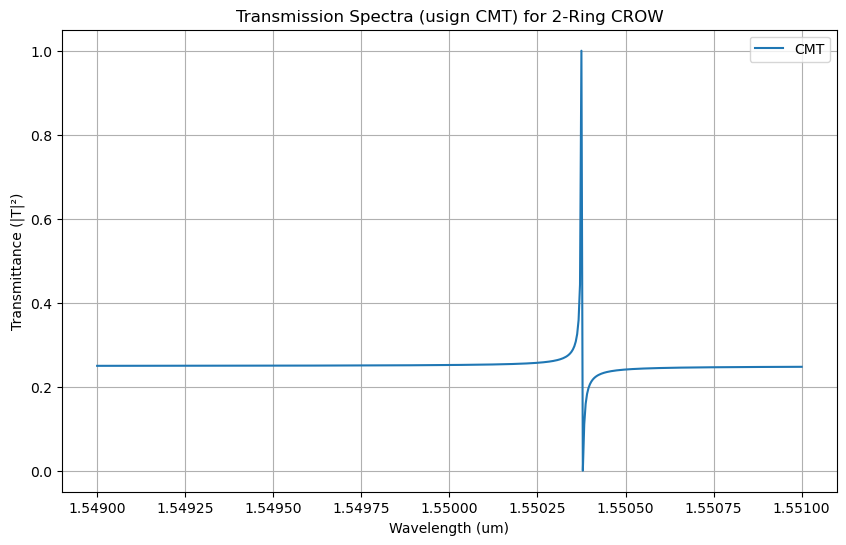

In [66]:
T_f = abs(T_norm)**2
plt.figure(figsize=(10, 6))
plt.plot(lambdas*1e6, T_f, label = "CMT" )
plt.xlabel("Wavelength (um)")
plt.ylabel("Transmittance (|T|²)")
plt.title("Transmission Spectra (usign CMT) for 2-Ring CROW")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# res = []
# for omega in w_eig_list[:,0]:
#     if (np.real(omega) < w_0_cpl[0]):
#         res.append(omega)

In [ ]:
# print(res)

[(3601.9904219927253+0.31999999999970896j), (3591.494868192821+0.31999999999970896j), (3580.999368707183+0.31999999999970896j), (3570.5039235348804+0.31999999999970896j), (3560.0085326749822+0.31999999999970896j), (3549.5131961288853+0.31999999999970896j), (3539.0179138942613+0.31999999999970896j), (3528.5226859720415+0.31999999999970896j), (3518.0275123603633+0.31999999999970896j), (3507.532393060158+0.31999999999970896j), (3497.0373280704944+0.31999999999970896j), (3486.542317390906+0.31999999999970896j), (3476.0473610204635+0.31999999999970896j), (3465.552458960562+0.31999999999970896j), (3455.057611208408+0.31999999999970896j), (3444.562817765399+0.31999999999970896j), (3434.0680786301373+0.31999999999970896j), (3423.573393802157+0.31999999999970896j), (3413.0787632819256+0.31999999999970896j), (3402.5841870680442+0.31999999999970896j), (3392.089665160048+0.31999999999970896j), (3381.5951975588678+0.31999999999970896j), (3371.1007842626414+0.31999999999970896j), (3360.6064252723+0.

In [100]:
resonances = []
# Invert the transmission to find dips (minima)
inverted = -T_norm

# Find peaks in the inverted signal (i.e., dips in original)
dip, _ = find_peaks(inverted)
peak, _ = find_peaks(T_norm)

a, b = lambdas[dip], lambdas[peak]

peaks = [a,b]

c:\Users\Mitali\anaconda3\Lib\site-packages\scipy\signal\_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


In [107]:
print(b - lambda_0_cpl[0])

[7.61523046e-11]


In [101]:
print(peaks)

[array([1.55037876e-06]), array([1.55037475e-06])]
